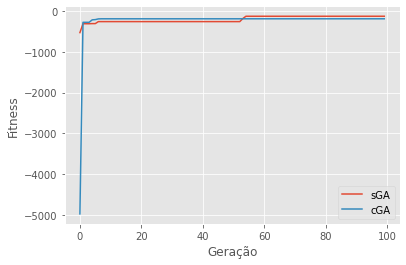

In [0]:
## ALGORITMO GENETICO COMPACTO e SIMPLES REAL GERAÇÕES FROSEN
import random
import numpy as np
import array as arr
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm
plt.style.use('ggplot')

progress_cga = []
progress_sga = []

###################          SGA        ###################

# geração da população
def generate_pop_sga(size,population_size):
    pop=[]

    for n in range(population_size):
      value = np.random.normal(0, 1, size )
      pop.append( {'val':value,'fit':0} )
    
    return pop

# cruzamento dos individuos
def crossover_sga(size,population,mutation):
    son = population[0].copy()
    son2 = population[1].copy()

    s = arr.array('f', son['val'])
    s2 = arr.array('f', son2['val'])
    middle = random.randrange(1,size-1)
    
    son['fit'] = 0
    son2['fit'] = 0
    
    son['val'] = s[:middle] + s2[middle:]
    son2['val'] = s2[:middle] + s[middle:]
    
    # mutation
    child = son['val']
    child2 = son2['val']

    c1 = []
    for c in child:
      mut = random.random()
      if(mut < mutation):
        c1.append(random.random())
      else:
        c1.append(c)
    son['val'] = c1

    c2 = []
    for s in child2:
      mut = random.random()
      if(mut < mutation):
        c2.append(random.random())
      else:
        c2.append(s)
    son2['val'] = c2

    #son['val'] = child
    #son2['val'] = child2

    return son,son2

# execução do algoritmo
def run_sga(generations, size, population_size):
    # criação da população aleatoria
    population = generate_pop_sga(size,population_size)
    population = fitness_function_sga(population)

    mutation = 0.01

    # percorre as gerações
    for i in range(generations):

      mid = int(population_size/2) if int(population_size/2) % 2 == 0 else int(population_size/2)-1
      new_population = []
      
      for j in range(0,mid,2):
        new_population += crossover_sga(size,population[j:j+2],mutation)
        #print(j,new_population)

      full_pop = population + new_population
      full_pop = fitness_function_sga(full_pop)

      population = full_pop[:population_size]
      
      #print ("generation: {} and population {}".format(i + 1,population))
      p = population[0]
      progress_sga.append(p['fit'])

# ordenação dos individuos
def sort_fit(e):
  return e['fit']

# funcao de fitness
def fitness_function_sga(population):
  fit = []
  for p in population:
    #print(p['val'])
    soma = 0
    m = p['val']
    for i,v in enumerate(m[:-1]):
      soma+= 100 * pow(pow(v, 2) + m[i + 1], 2) + pow(v - 1, 2)
    p['fit']= soma*-1 
    fit.append(p)

  fit.sort(reverse = True,key=sort_fit)
  
  return fit

###################          CGA        ###################

# estrutura do algoritmo do cga
class Solution(object):
    def __init__(self, value):
        self.value = value
        self.fitness = 0

    def calculate_fitness(self):
        self.fitness = fitness_function(self.value)

# criação dos individuos
def generate_candidate(vector):

    medias = vector[0]
    desvios = vector[1]
    if medias[0] == 0:
        value = np.random.normal(0, 1, len(medias) )
    else:
        value = []
        for m in range(len(medias)):
          v = np.random.normal(medias[m], desvios[m], 1)
          value.append(v[0])
    return Solution(value)

# criação do vetor de probabilidades
def generate_vector(size):
    return [[0.0] * size, [1] * size]

# competição dos fitness
def compete(a, b):
    if a.fitness > b.fitness:
        return a, b
    else:
        return b, a

# atualiza o vetor de probabilidade
def update_vector(vector, winner, loser, size):
    win = winner.value
    los = loser.value
    vM = vector[0]
    vD = vector[1]

    for i in range(size):
      vecMed = []
      vecMed.append(win[i])
      vecMed.append(vM[i])
      
      if win[i] != los[i]:
        vM[i] = statistics.mean(vecMed)
        vD[i] = statistics.stdev(vecMed)

# execução do algoritmo
def run_cga(generations, size, population_size):
    # probabilidade do vetor
    vector = generate_vector(size)
    best = None

    for i in range(generations):
        # gerando dois individuos
        s1 = generate_candidate(vector)
        s2 = generate_candidate(vector)

        # calculo de fitness de cada um 
        s1.calculate_fitness()
        s2.calculate_fitness()

        # competição entre os individuos
        winner, loser = compete(s1, s2)
        
        # verifica qual é o melhor
        if best:
            if winner.fitness > best.fitness:
                best = winner
        else:
            best = winner

        # atualização do vector de criação dos individuo
        update_vector(vector, winner, loser, size)

        #print ("generation: {} best value: {} best fitness: {}".format(i + 1, best.value, best.fitness) )
        progress_cga.append(best.fitness)
        
# função fitness do cga
def fitness_function(value):
  soma = 0
  for i, u in enumerate(value[:-1]):
      soma+= 100 * pow(pow(u, 2) + value[i + 1], 2) + pow(u - 1, 2)
  return soma*-1

# função que mostra o gráfico
def plotgraphics(progress_cga,progress_sga):
  line_sga, = plt.plot(progress_sga, label='sGA')
  line_cga, = plt.plot(progress_cga, label='cGA')
  plt.legend([line_sga, line_cga], ['sGA', 'cGA'])
  plt.xlabel('Geração')
  plt.ylabel('Fitness')
  plt.show()

# execução dos algoritmos
run_cga(100, 10, 10)
run_sga(100, 10, 10)
plotgraphics(progress_cga,progress_sga)